<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/classdemo/overfit_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

created by FBB
for PUS2020

objectives:
 - creating polynomials with sklearn
 - fitting polynomials to data with statsmodels

accidental objectives:
 - animating plots in google colab
 - creating synthetic data with random variable (reproducible)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

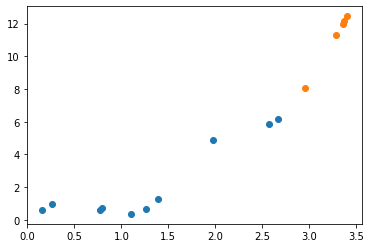

In [174]:
# setting a random state (or seed) so that the code is reproducible
rng = np.random.RandomState(444)
# random exogenous values
x = 4 * rng.rand(15)
# endogenous values with random noise: the model is a power law (x**2) + a cyclic component
y = x**2 + np.sin(x * 4) + 0.05 * rng.randn(15)

# modifying the dimension of the data to feed it to statsmodels and sklearn
x = x[:,np.newaxis]
y = y[:,np.newaxis]

# sort x values and get index  
inds = x.ravel().argsort()    
x = x.ravel()[inds].reshape(-1,1)
y = y[inds] 

#Plot
plt.scatter(x[:10],y[:10])
plt.scatter(x[10:],y[10:]);

In [175]:
#creates the right structure: this is a 2d array ready to be multiplied by the n polynomial coefficients
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=1)
xp1 = polynomial_features.fit_transform(x)
xp1, xp1.shape

(array([[1.        , 0.15655962],
        [1.        , 0.26268955],
        [1.        , 0.77436965],
        [1.        , 0.78837153],
        [1.        , 1.10600256],
        [1.        , 1.26544201],
        [1.        , 1.38945891],
        [1.        , 1.97363657],
        [1.        , 2.56882866],
        [1.        , 2.66889047],
        [1.        , 2.9589692 ],
        [1.        , 3.28517986],
        [1.        , 3.35744419],
        [1.        , 3.36943235],
        [1.        , 3.39681717]]), (15, 2))

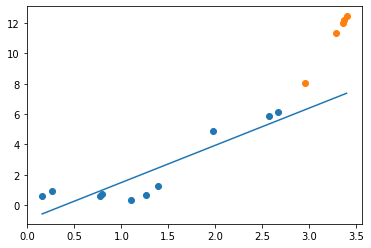

In [176]:
import statsmodels.api as sm
#this fits the polynomial to the data
model = sm.OLS(y[:10], xp1[:10]).fit()
ypred = model.predict(xp1) 
plt.scatter(x[:10], y[:10])
plt.scatter(x[10:], y[10:]);
plt.plot(x,ypred);

In [179]:
#calculates the mean square error 
def resid(y,yp):
  return (np.sum((y[:10].flatten() - yp[:10])**2)) / 10,\
        (np.sum((y[10:].flatten() - yp[10:])**2) / 5) 

1 parameters:
residuals train: 5.20
test: 83.49 


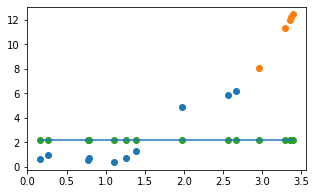

2 parameters:
residuals train: 1.03
test: 18.57 


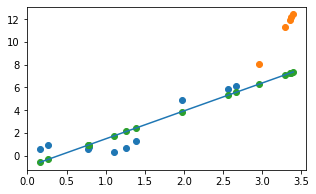

3 parameters:
residuals train: 0.37
test: 0.74 


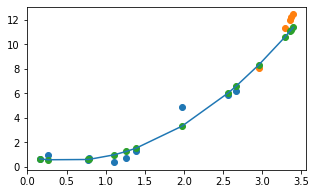

4 parameters:
residuals train: 0.22
test: 34.74 


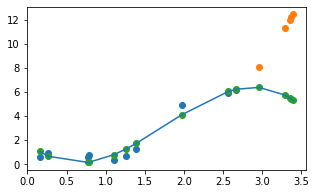

5 parameters:
residuals train: 0.05
test: 552.67 


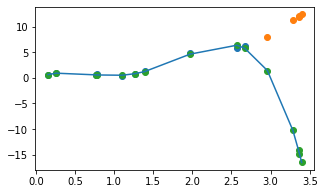

6 parameters:
residuals train: 0.02
test: 3.08 


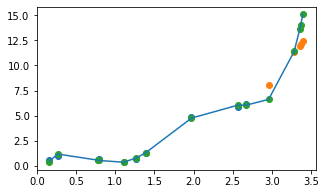

7 parameters:
residuals train: 0.00
test: 1053.48 


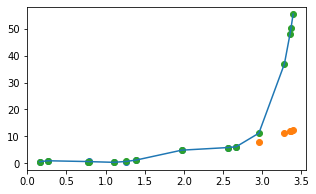

8 parameters:
residuals train: 0.00
test: 260.15 


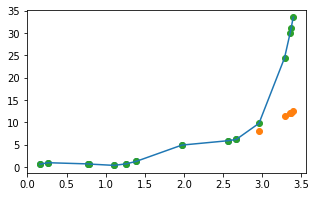

9 parameters:
residuals train: 0.00
test: 171494.35 


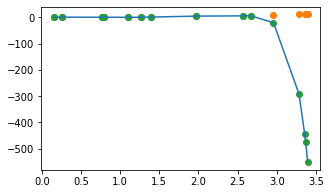

10 parameters:
residuals train: 0.00
test: 258337148.94 


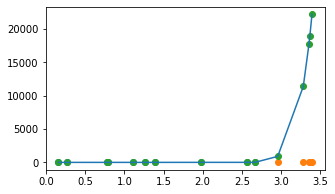

11 parameters:
residuals train: 0.00
test: 1580382567.07 


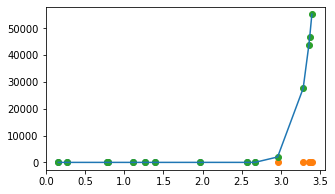

12 parameters:
residuals train: 0.00
test: 9886808827.63 


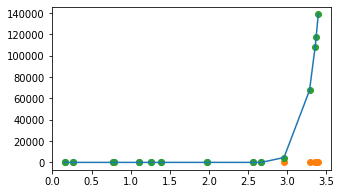

13 parameters:
residuals train: 0.00
test: 63331226813.81 


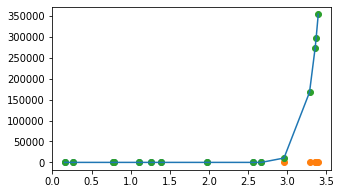

14 parameters:
residuals train: 0.00
test: 415937437564.86 


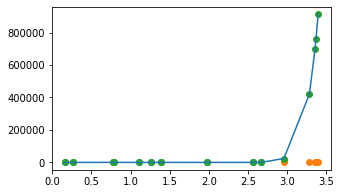

15 parameters:
residuals train: 0.00
test: 2803931176626.33 


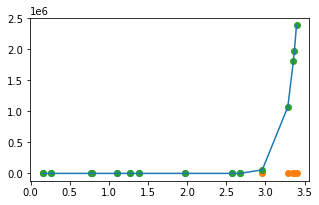

In [182]:
#set a container for the result: the target variable
result = np.zeros((len(x), 2))
# in a for loop increase the complexity of the model and fit it, plot the results
for n in range(len(x)):
  polynomial_features = PolynomialFeatures(degree=n)
  xp = polynomial_features.fit_transform(x)
  model = sm.OLS(y[:10], xp[:10]).fit()
  ypred = model.predict(xp) 
  plt.figure(figsize=(5,3))
  plt.scatter(x[:10], y[:10])
  plt.scatter(x[10:], y[10:]);
  plt.plot(x, ypred);
  plt.scatter(x, ypred);
  print("{} parameters:\nresiduals train: {:.2f}\ntest: {:.2f} ".format(n + 1, 
                                                              *resid(y, ypred)))
  plt.show()
  result[n] = resid(y, ypred)


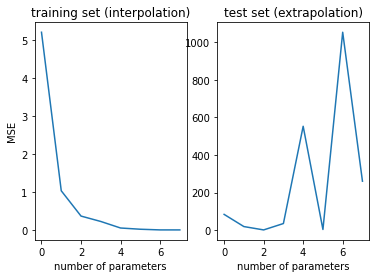

In [193]:
fig, ax = plt.subplots(1,2)
ax[0].plot(result[:8,0])
ax[0].set_xlabel("number of parameters")
ax[0].set_ylabel("MSE")
ax[0].set_title("training set (interpolation)")

ax[1].plot(result[:8,1])
ax[1].set_xlabel("number of parameters")
ax[1].set_title("test set (extrapolation)");





In [194]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


ax.set_xlim(( 0, 4))
ax.set_ylim((-20, 20))
ax.set_xlabel("x")
ax.set_ylabel("y")

data1, = ax.plot([], [], '.')
data2, = ax.plot([], [], '.')
line, = ax.plot([], [])
annotation_c2 = ax.annotate('interp:{:.2f} ectrap:{:.2f}', 
                                   xy=(0.5, 10),
                               xytext=(0.5, 10))

# initialization function: plot the background of each frame
def init():
    data1.set_data(x[:10], y[:10])
    data2.set_data(x[10:], y[10:])
    line.set_data([], [])
    annotation_c2 = ax.annotate('', 
                                   xy=(0.5, 10),
                               xytext=(0.5, 10))
    
    return (line, data1, data2, annotation_c2)

# animation function. This is called sequentially  
def animate(n):
  polynomial_features = PolynomialFeatures(degree=n)
  xp = polynomial_features.fit_transform(x)
  xpall = polynomial_features.fit_transform(np.linspace(0,8,100)[:,
                                          np.newaxis])
  
  model = sm.OLS(y[:10], xp[:10]).fit()
  ypred = model.predict(xp) 
  ypall = model.predict(xpall) 

  line.set_data(np.linspace(0, 8, 100), ypall)
  annotation_c2.set_text ("n paramters: {:d}\ninterpolation: {:.2f}\nextrapolation: {:.2f} ".format(n+1, *resid(y, ypred)))

  return (line,)
  

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=15, interval=500, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim